Script to create noisy arteficial data 

In [1]:
# import libaries 
import numpy as np
import torch
from scipy.integrate import odeint

In [2]:
#set up ODE 
def equation(y, t):
    #the equation is A <-> B+C and C<->D
    cA,cB,cC,cD=y  #array of concentrations
   

    k1 = 1    # kinetic constants of the chemical reactions
    k2 = 0.5
    k3 = 3
    k4 = 2


    dA_dt = - k1 * cA + k2 * cB * cC                             #dA/dt
    dB_dt = + k1 * cA - k2 * cB * cC                             #dB/dt
    dC_dt = + k1 * cA - k2 * cB * cC - k3 * cC + k4 * cD         #dC/dt
    dD_dt = + k3 * cC - k4 * cD                                  #dD/dt

    return [dA_dt, dB_dt, dC_dt, dD_dt]



In [3]:
#define initial conditions and time points and solve ODE
y0 = [1., 0., 0., 0.] #initial concentrations
t = np.linspace(0, 10, 101)         #time
Conc= odeint(equation, y0,t)        #solve ODE

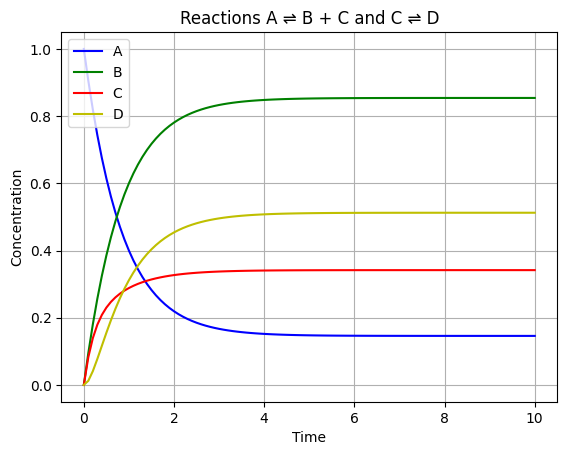

In [4]:
#plot solutions
import matplotlib.pyplot as plt
plt.plot(t, Conc[:, 0], 'b', label='A')
plt.plot(t, Conc[:, 1], 'g', label='B')
plt.plot(t, Conc[:, 2], 'r', label='C')
plt.plot(t, Conc[:, 3], 'y', label='D')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Reactions A ⇌ B + C and C ⇌ D')
plt.grid()
plt.show()

In [5]:
#Add noise
noise_std=0.01      #standard deviation of the noise,  the larger the std the more noise
num_points=(101,4)  #shape of the data
Conc_noise = Conc + np.random.normal(0, noise_std,num_points)



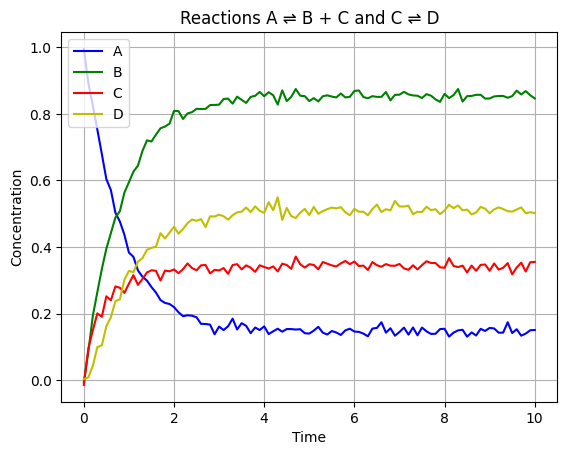

In [6]:
#plot noisy solutions
plt.plot(t, Conc_noise[:, 0], 'b', label='A')
plt.plot(t, Conc_noise[:, 1], 'g', label='B')
plt.plot(t, Conc_noise[:, 2], 'r', label='C')
plt.plot(t, Conc_noise[:, 3], 'y', label='D')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Reactions A ⇌ B + C and C ⇌ D')
plt.grid()
plt.show()

In [7]:
# save as csv file
import pandas as pd
df=pd.DataFrame
df_final=df({'time': t, 'ConcA': Conc_noise[:, 0], 'ConcB': Conc_noise[:, 1], 'ConcC': Conc_noise[:, 2], 'ConcD': Conc_noise[:, 3]} )
print (df_final)

output_file = "/workspaces/bio-pinn/Wiebke (Arteficial Data)/Data_noisy.csv"
df_final.to_csv(output_file, index=False)

print(f"Daten erfolgreich erweitert und in {output_file} gespeichert.")

     time     ConcA     ConcB     ConcC     ConcD
0     0.0  0.994669 -0.005747 -0.013655  0.003871
1     0.1  0.892689  0.085837  0.095478  0.008688
2     0.2  0.824135  0.194037  0.150377  0.043714
3     0.3  0.752378  0.265149  0.201116  0.100012
4     0.4  0.678789  0.334336  0.190981  0.105275
..    ...       ...       ...       ...       ...
96    9.6  0.153484  0.869480  0.338554  0.512678
97    9.7  0.134096  0.858041  0.353139  0.519071
98    9.8  0.140395  0.868077  0.326654  0.501598
99    9.9  0.150394  0.855664  0.354416  0.504462
100  10.0  0.151180  0.846118  0.355460  0.502241

[101 rows x 5 columns]
Daten erfolgreich erweitert und in /workspaces/bio-pinn/Wiebke (Arteficial Data)/Data_noisy.csv gespeichert.
